<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/python/modeloOBJETIVO1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

direccion0='https://raw.githubusercontent.com/jamg-upv/CAHOS19/main/inputtables/dataset1fake1.csv'
df=pd.read_csv(direccion0, delimiter=';')

df

,Id,edad,sexo,CNH,fechaingrehosp,fechaingreuci,fechaaltauci,fechaaltahosp,fechadefunc,fechatraslado,altadeftraslado,ComorbidityIndex
0,574,25,0,120115,2020-09-02,2020-09-08,2020-09-08,2020-09-08,NaN,NaN,a,"0,9797155"
1,1443,75,0,120115,2020-09-02,2020-09-18,2020-09-18,2020-09-18,2020-09-18,NaN,d,"12,19730955"
2,2210,75,0,120115,2020-09-02,2020-09-09,2020-10-01,2020-10-01,NaN,NaN,a,"16,12867379"
3,2986,45,0,120115,2020-09-02,2020-09-07,2020-09-07,2020-09-07,NaN,NaN,a,"1,89360647"
4,3271,55,0,120115,2020-09-02,2020-09-10,2020-09-10,2020-09-10,NaN,NaN,a,"3,3809675"
...,...,...,...,...,...,...,...,...,...,...,...,...
13776,6041,85,1,30211,2021-03-25,2021-04-01,2021-04-17,2021-04-17,2021-04-17,NaN,d,"34,20417419"
13777,6374,85,0,30211,2021-03-25,2021-03-31,2021-04-21,2021-04-21,NaN,NaN,a,"36,38422045"
13778,7765,45,1,460044,2021-03-25,2021-04-01,2021-04-01,2021-04-01,NaN,NaN,a,"3,446363775"
13779,9872,55,1,460044,2021-03-25,2021-03-30,2021-04-10,2021-04-16,NaN,NaN,a,"8,273426354"


In [3]:
#Cogemos como muestra los primeros 200 días después del día 2020-09-15
#Los cálculos acabarían el día 2021-04-03
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=200, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1

  df2.at[row, 'count'] = counter
df2
df2.to_csv('ocupacion.csv')

(array([737699., 737730., 737760., 737791., 737822., 737850., 737881.]),
 <a list of 7 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


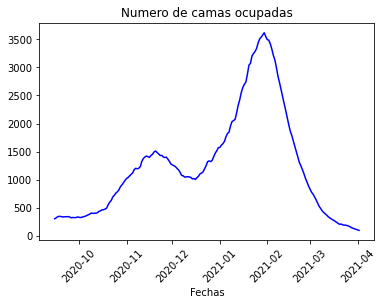

In [6]:
#OCUPACIÓN DE CAMAS POR DÍA
x=df2['date']
y=df2['count']
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(x, y, color='B')
plt.title('Numero de camas ocupadas')
plt.xlabel('Fechas')
plt.xticks(rotation=45)

In [7]:
#Cogemos como muestra los primeros 225 días después del día 2020-09-15
#Los cálculos acabarían el día 2021-04-28
df2 = pd.DataFrame()
dias = pd.date_range('2020-09-15', periods=225, freq='D')
df2['date'] = dias
df2['count']=0

for row, fila in df2.iterrows():
  counter = 0
  for Id, user in df.iterrows():
    if (pd.to_datetime(user['fechaingrehosp']) <= pd.to_datetime(fila['date'])) & (pd.to_datetime(user['fechaaltahosp']) >= pd.to_datetime(fila['date'])):
      counter += 1

  df2.at[row, 'count'] = counter

df2.to_csv('ocupacion225dias.csv')


(array([737699., 737730., 737760., 737791., 737822., 737850., 737881.,
        737911.]), <a list of 8 Text major ticklabel objects>)

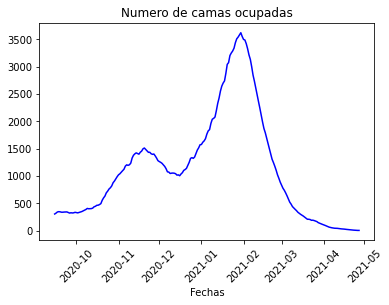

In [8]:
#OCUPACIÓN DE CAMAS POR DÍA
x_2=df2['date']
y_2=df2['count']
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(x_2, y_2, color='B')
plt.title('Numero de camas ocupadas')
plt.xlabel('Fechas')
plt.xticks(rotation=45)